<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               500 non-null    int64  
 1   diagnosis        500 non-null    int64  
 2   mean_radius      500 non-null    float64
 3   mean_texture     500 non-null    float64
 4   mean_perimeter   500 non-null    float64
 5   mean_area        500 non-null    float64
 6   mean_smoothness  500 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 27.5 KB
None
               id   diagnosis  mean_radius  mean_texture  mean_perimeter  \
count  500.000000  500.000000   500.000000    500.000000      500.000000   
mean   250.500000    0.414000    17.229271     20.351162       99.647649   
std    144.481833    0.493042     4.282402      5.943859       28.700986   
min      1.000000    0.000000    10.069480     10.098800       50.321826   
25%    125.750000    0.000000    13.436489    

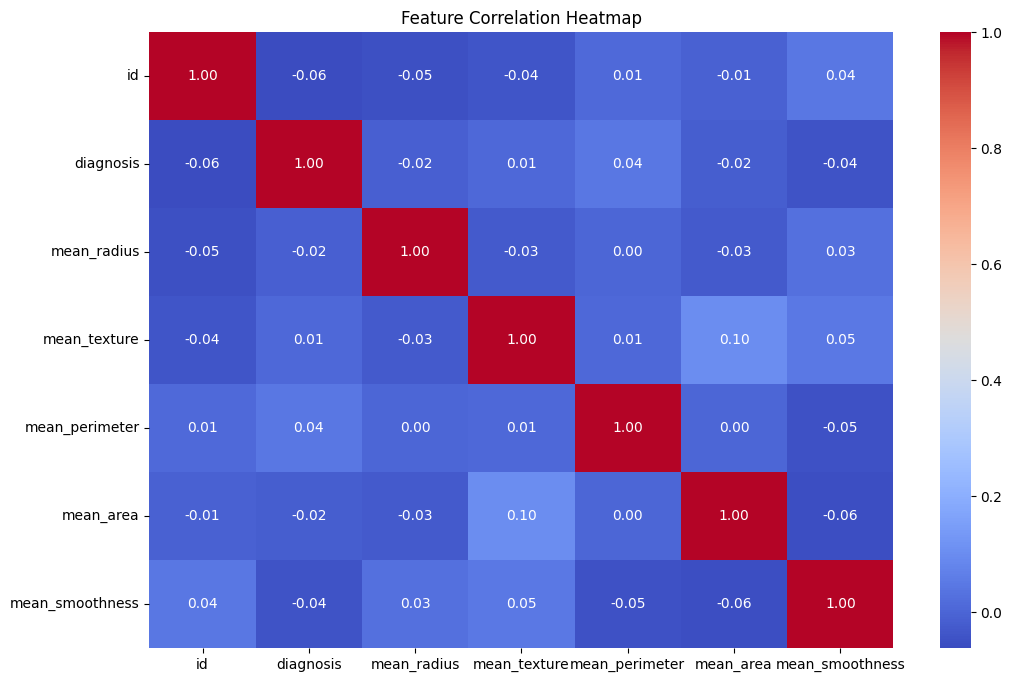

Confusion Matrix:
[[48  9]
 [36  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.84      0.68        57
           1       0.44      0.16      0.24        43

    accuracy                           0.55       100
   macro avg       0.50      0.50      0.46       100
weighted avg       0.51      0.55      0.49       100



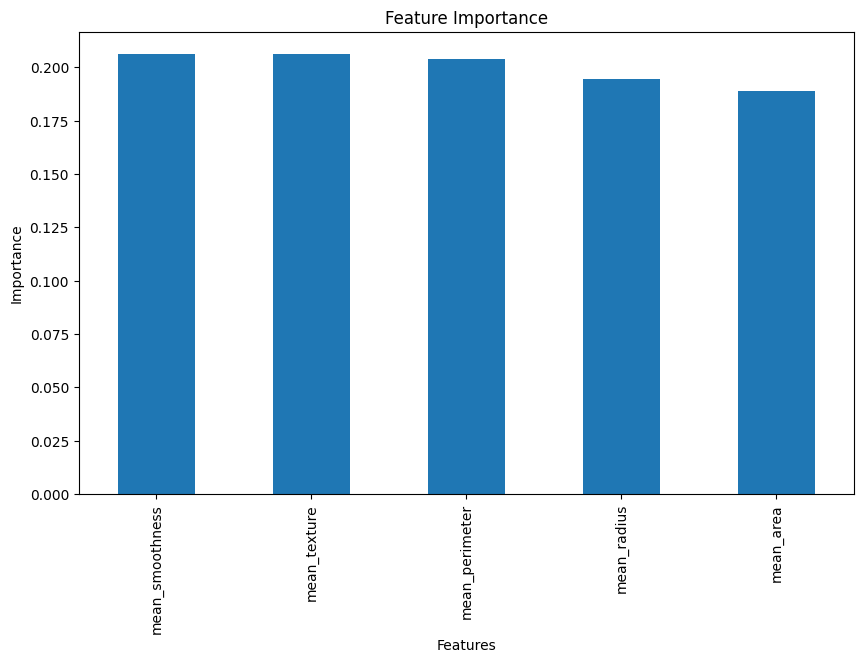

['breast_cancer_model.pkl']

In [4]:
# Breast Cancer Analysis Code

# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load dataset
data_path = 'breast_cancer_data_large.csv'

# Download breast_cancer_data_large.csv from Kaggle if it doesn't exist.
if not os.path.exists(data_path):
    print(f"Dataset not found at '{data_path}'. Downloading...")
    !pip install kaggle
    # create the proper directory if needed.
    if not os.path.exists('/root/.kaggle'):
      !mkdir /root/.kaggle
    # move the kaggle json key there
    !mv kaggle.json /root/.kaggle/
    # change the permissions to make sure it's read.
    !chmod 600 /root/.kaggle/kaggle.json
    # download the dataset from kaggle, unzipping it.
    !kaggle datasets download -d uciml/breast-cancer-wisconsin-data -p . --unzip
    # check if the file exists.
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Dataset not found at '{data_path}'. Failed to download dataset.")
    print(f"Dataset downloaded and saved as '{data_path}'.")

data = pd.read_csv(data_path)

# Data preprocessing
# Assuming 'diagnosis' is the target variable (e.g., 'M' for malignant, 'B' for benign)
# Convert diagnosis to a numeric type before performing correlation.
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Display basic dataset information
print(data.info())
print(data.describe())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Visualize correlations between features using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Separate features and target variable
X = data.drop(columns=['diagnosis', 'id'])  # Drop target and identifier columns
y = data['diagnosis']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Feature importance visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Save the trained model (optional)
# Replace 'breast_cancer_model.pkl' with your desired filename
joblib.dump(rf_model, 'breast_cancer_model.pkl')